## Observations and Insights 

In [211]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [212]:
# Checking the number of mice.
mouse_study["Mouse ID"].count()

1893

In [213]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study[mouse_study.duplicated(["Mouse ID","Timepoint"])]
duplicate_ID = duplicate_mice["Mouse ID"].iloc[0]
duplicate_ID

'g989'

In [214]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study.loc[mouse_study["Mouse ID"] == duplicate_ID]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [215]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study = mouse_study.loc[mouse_study["Mouse ID"] != duplicate_ID]
clean_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [216]:
# Checking the number of mice in the clean DataFrame.
clean_study.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [217]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = clean_study[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").mean()
drug_median = clean_study[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").median()
drug_sem = clean_study[["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen").sem()
summary_table = pd.merge(drug_mean,drug_median, on="Drug Regimen")
summary_table = summary_table.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Mean","Tumor Volume (mm3)_y":"Tumor Volume Median"})

regimen_table = clean_study.groupby(["Drug Regimen"])
regimen_table["Tumor Volume (mm3)"].describe()
drug_std = regimen_table["Tumor Volume (mm3)"].std()
drug_var = regimen_table["Tumor Volume (mm3)"].var()

summary_table["Tumor Volume (mm3) Std Dev"] = drug_std
summary_table["Tumor Volume (mm3) Variance"] = drug_var
summary_table["Tumor Volume (mm3) SEM"] = drug_sem

summary_table

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) Variance,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [218]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
statistics_table = clean_study.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)":['mean','median','std','var','sem']})
statistics_table


Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

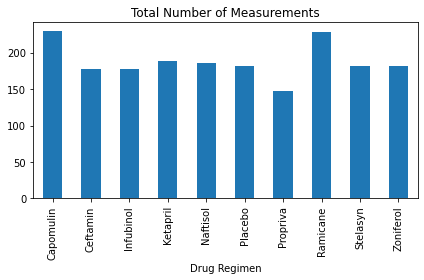

In [219]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

plot_data = regimen_table["Tumor Volume (mm3)"].describe()
pandas_plot_data = plot_data['count']
pandas_plot_data.plot(kind="bar")
plt.title("Total Number of Measurements")
plt.tight_layout()

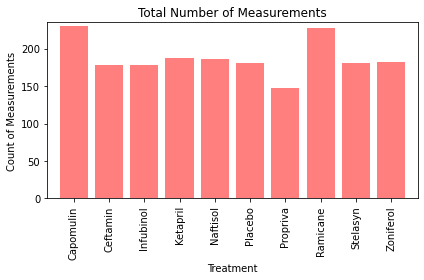

In [220]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plot_data = regimen_table["Tumor Volume (mm3)"].describe()
labels = list(plot_data.index)

x_axis = np.arange(len(labels))
y_axis = plot_data["count"]

plt.bar(x_axis,y_axis, color='r', alpha=0.5, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, labels, rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(y_axis)+5)
plt.ylabel("Count of Measurements")
plt.xlabel("Treatment")
plt.title("Total Number of Measurements")
plt.tight_layout()

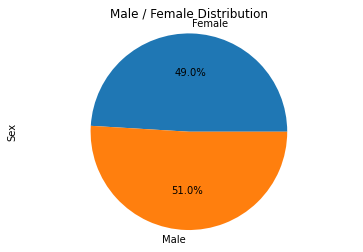

In [221]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_data = clean_study.groupby(["Sex"])
pie_count = pie_data['Sex'].count()


pie_chart = pie_count.plot(kind="pie",autopct='%1.1f%%')
plt.title("Male / Female Distribution")
plt.axis("equal")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

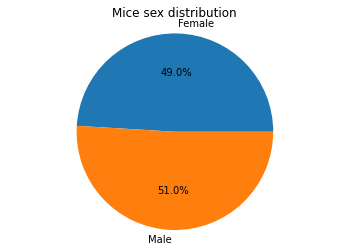

In [238]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_labels = list(pie_count.index)
plt.pie(pie_count,labels=pie_labels,autopct="%1.1f%%")
plt.title("Mice sex distribution")
plt.axis("equal")
plt.show

## Quartiles, Outliers and Boxplots

In [223]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = regimen_table['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor = pd.merge(last_timepoint,clean_study)
final_tumor_Capo = final_tumor.loc[final_tumor["Drug Regimen"] == 'Capomulin']
final_tumor_Rami = final_tumor.loc[final_tumor["Drug Regimen"] == 'Ramicane']
final_tumor_Infu = final_tumor.loc[final_tumor["Drug Regimen"] == 'Infubinol']
final_tumor_Ceft = final_tumor.loc[final_tumor["Drug Regimen"] == 'Ceftamin']



In [224]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_Capo = final_tumor_Capo['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_Capo = quartiles_Capo[0.25]
upperq_Capo = quartiles_Capo[0.75]
iqr_Capo = upperq_Capo-lowerq_Capo
lower_bound_Capo = lowerq_Capo - (1.5*iqr_Capo)
upper_bound_Capo = upperq_Capo + (1.5*iqr_Capo)

print("Capomulin")
print("-----------")
print(f"Values below {lower_bound_Capo} could be outliers.")
print(f"Values above {upper_bound_Capo} could be outliers.")

outlier_mice_Capo = final_tumor_Capo.loc[(final_tumor_Capo['Tumor Volume (mm3)'] < lower_bound_Capo) | (final_tumor_Capo['Tumor Volume (mm3)'] > upper_bound_Capo)]
print(outlier_mice_Capo)

quartiles_Rami = final_tumor_Rami['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_Rami = quartiles_Rami[0.25]
upperq_Rami = quartiles_Rami[0.75]
iqr_Rami = upperq_Rami-lowerq_Rami
lower_bound_Rami = lowerq_Rami - (1.5*iqr_Rami)
upper_bound_Rami = upperq_Rami + (1.5*iqr_Rami)
print("-----------")
print("Ramicane")
print("-----------")
print(f"Values below {lower_bound_Rami} could be outliers.")
print(f"Values above {upper_bound_Rami} could be outliers.")

outlier_mice_Rami = final_tumor_Rami.loc[(final_tumor_Rami['Tumor Volume (mm3)'] < lower_bound_Rami) | (final_tumor_Rami['Tumor Volume (mm3)'] > upper_bound_Rami)]
print(outlier_mice_Rami)

quartiles_Infu = final_tumor_Infu['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_Infu = quartiles_Infu[0.25]
upperq_Infu = quartiles_Infu[0.75]
iqr_Infu = upperq_Infu-lowerq_Infu
lower_bound_Infu = lowerq_Infu - (1.5*iqr_Infu)
upper_bound_Infu = upperq_Infu + (1.5*iqr_Infu)
print("-----------")
print("Infubinol")
print("-----------")
print(f"Values below {lower_bound_Infu} could be outliers.")
print(f"Values above {upper_bound_Infu} could be outliers.")

outlier_mice_Infu = final_tumor_Infu.loc[(final_tumor_Infu['Tumor Volume (mm3)'] < lower_bound_Infu) | (final_tumor_Infu['Tumor Volume (mm3)'] > upper_bound_Infu)]
print(outlier_mice_Infu)

quartiles_Ceft = final_tumor_Ceft['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_Ceft = quartiles_Ceft[0.25]
upperq_Ceft = quartiles_Ceft[0.75]
iqr_Ceft = upperq_Ceft-lowerq_Ceft
lower_bound_Ceft = lowerq_Ceft - (1.5*iqr_Ceft)
upper_bound_Ceft = upperq_Ceft + (1.5*iqr_Ceft)
print("-----------")
print("Ceftamin")
print("-----------")
print(f"Values below {lower_bound_Ceft} could be outliers.")
print(f"Values above {upper_bound_Ceft} could be outliers.")

outlier_mice_Ceft = final_tumor_Ceft.loc[(final_tumor_Ceft['Tumor Volume (mm3)'] < lower_bound_Ceft) | (final_tumor_Ceft['Tumor Volume (mm3)'] > upper_bound_Ceft)]
print(outlier_mice_Ceft)

# Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin
-----------
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Empty DataFrame
Columns: [Timepoint, Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
-----------
Ramicane
-----------
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
Empty DataFrame
Columns: [Timepoint, Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
-----------
Infubinol
-----------
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.
Empty DataFrame
Columns: [Timepoint, Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
-----------
Ceftamin
-----------
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.
Empty DataFrame
Columns: [Timepoint, Mouse ID, Drug Regimen, Sex, Age_month

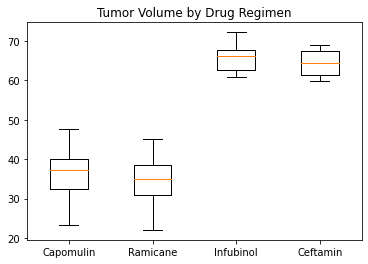

In [225]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

volumes_Capo = final_tumor_Capo['Tumor Volume (mm3)']
volumes_Rami = final_tumor_Rami['Tumor Volume (mm3)']
volumes_Infu = final_tumor_Infu['Tumor Volume (mm3)']
volumes_Ceft = final_tumor_Ceft['Tumor Volume (mm3)']

volumes=[volumes_Capo, volumes_Rami, volumes_Infu, volumes_Ceft]
fig1, ax1 = plt.subplots()
ax1.boxplot(volumes)
ax1.set_title("Tumor Volume by Drug Regimen")
plt.xticks([1,2,3,4],['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

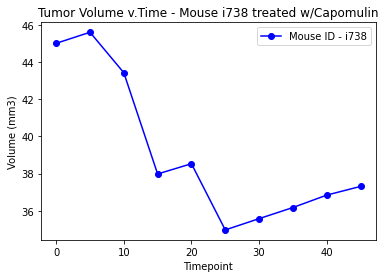

In [226]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_table = clean_study.loc[clean_study["Drug Regimen"] == "Capomulin"]
# Used the following lines to pull a random Mouse ID treated with Capomulin
#capo_mouse_line = capomulin_table.sample(1)
#capo_mouse = str(capo_mouse_line["Mouse ID"])
capo_mouse = "i738"
capo_mouse_table = capomulin_table.loc[capomulin_table["Mouse ID"] == capo_mouse]
x_axis = capo_mouse_table["Timepoint"]
y_axis = capo_mouse_table["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis,marker="o",color="b", label="Mouse ID - i738")
plt.legend(loc="upper right")
plt.xlabel("Timepoint")
plt.ylabel("Volume (mm3)")
plt.title("Tumor Volume v.Time - Mouse i738 treated w/Capomulin")
plt.show()



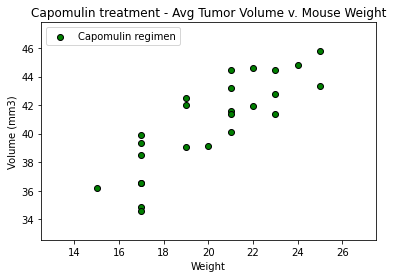

In [236]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_capomulin = capomulin_table.groupby("Mouse ID")
avg_capomulin = mouse_capomulin.mean()
avg_tumor = avg_capomulin["Tumor Volume (mm3)"]
mice_weight = avg_capomulin["Weight (g)"]

plt.scatter(mice_weight,avg_tumor,marker="o",facecolors="green",edgecolors="black",label="Capomulin regimen")
plt.xlim(min(mice_weight)-2.5,max(mice_weight)+2.5)
plt.ylim(min(avg_tumor)-2,max(avg_tumor)+2)
plt.legend(loc="upper left")
plt.title("Capomulin treatment - Avg Tumor Volume v. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between Avg Tumor Volume and Mice Weight is 0.84


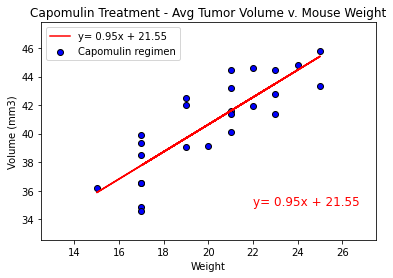

In [237]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor, mice_weight)
print(f"The correlation between Avg Tumor Volume and Mice Weight is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mice_weight, avg_tumor)
regress_values = mice_weight * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mice_weight,avg_tumor,marker="o",facecolors="blue",edgecolors="black",label="Capomulin regimen")
plt.plot(mice_weight,regress_values,"r-",label=line_eq)
plt.legend(loc="upper left")
plt.annotate(line_eq,(22,35),fontsize=12,color="red")
plt.xlim(min(mice_weight)-2.5,max(mice_weight)+2.5)
plt.ylim(min(avg_tumor)-2,max(avg_tumor)+2)
plt.title("Capomulin Treatment - Avg Tumor Volume v. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Volume (mm3)")
plt.show()
